Importing libraries and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from keras.datasets import mnist

Load the data and split it to train and test

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Get the image size

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Looking through the dataset

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Print the image label

In [ ]:
y_train[0]

5

Let's look into the image using matplotlib

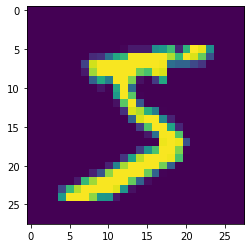

In [ ]:
plt.imshow(x_train[0])
plt.show()

Normalize the data



In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Model development

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10,validation_split=0.4)

2022-01-16 11:11:49.633761: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Epoch 1/10
1125/1125 [==============================] - 12s 8ms/step - loss: 0.5691 - accuracy: 0.8123 - val_loss: 0.0863 - val_accuracy: 0.9796
Epoch 2/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.1486 - accuracy: 0.9639 - val_loss: 0.0614 - val_accuracy: 0.9853
Epoch 3/10
1125/1125 [==============================] - 9s 8ms/step - loss: 0.1018 - accuracy: 0.9754 - val_loss: 0.0743 - val_accuracy: 0.9858
Epoch 4/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0844 - accuracy: 0.9794 - val_loss: 0.0537 - val_accuracy: 0.9880
Epoch 5/10
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0698 - accuracy: 0.9835 - val_loss: 0.0597 - val_accuracy: 0.9878
Epoch 6/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0660 - accuracy: 0.9848 - val_loss: 0.0590 - val_accuracy: 0.9890
Epoch 7/10
1125/1125 [==============================] - 8s 7ms/step - loss: 0.0534 - accuracy: 0.9873 - val_loss: 0.0644 - val_accuracy

In [ ]:
y_pred = model.predict(x_test)
y_pred[8]

array([8.9347146e-17, 2.7930465e-17, 2.1704242e-20, 1.3151155e-10,
       4.5683069e-14, 1.0000000e+00, 7.6279157e-11, 3.4232805e-21,
       2.8980110e-10, 9.6447737e-12], dtype=float32)

In [ ]:
np.argmax(y_pred[8])

5

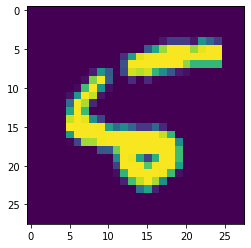

In [ ]:
plt.imshow(x_test[8])

In [ ]:
from keras.models import load_model

model.save('my_model.h5')
model = load_model('my_model.h5')

# Model Deployment

In [ ]:
# !pip install ipykernel>=4.10.1
# !pip install pydeck

In [ ]:
# ! pip install streamlit
# ! pip install numpy
# ! pip install matplotlib
# ! pip install keras
# ! pip install pandas
# ! pip install opencv-python

In [ ]:
# %%writefile app.py
# import streamlit as st
# import tensorflow as tf
# import numpy as np
# import keras
# import matplotlib.pyplot as plt
# import pandas as pd
# from PIL import Image
# from streamlit_drawable_canvas import st_canvas
# import cv2

In [ ]:
# model = keras.models.load_model(r"/content/my_model.h5")
# stroke_width = st.sidebar.slider("Stroke width: ", 28,28,1)
# stroke_color = st.sidebar.color_picker("Stroke color hex: ")
# bg_color = st.sidebar.color_picker("Background color hex: ", "#eee")
# bg_image = st.sidebar.file_uploader("Background image:", type=["png", "jpg"])
# drawing_mode = st.sidebar.selectbox(
#     "Drawing tool:", ("freedraw", "line", "rect", "circle", "transform", "polygon")
# )
# realtime_update = st.sidebar.checkbox("Update in realtime", True)

# # Create a canvas component
# canvas_result = st_canvas(
#     fill_color="rgba(255, 165, 0, 0.3)",  # Fixed fill color with some opacity
#     stroke_width=stroke_width,
#     stroke_color=stroke_color,
#     background_color=bg_color,
#     background_image=Image.open(bg_image) if bg_image else None,
#     update_streamlit=realtime_update,
#     height=300,
#     drawing_mode=drawing_mode,
#     display_toolbar=st.sidebar.checkbox("Display toolbar", True),
#     key="full_app",
# )

# # Do something interesting with the image data and paths
# if canvas_result.image_data is not None:
#     #st.image(canvas_result.image_data)
#     image = canvas_result.image_data
#     image1 = image.copy()
#     image1 = image1.astype('uint8')
#     image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
#     image1 = cv2.resize(image1,(28,28))
#     st.image(image1)

#     image1.resize(1,28,28,1)
#     st.title(np.argmax(model.predict(image1)))
# if canvas_result.json_data is not None:
#     st.dataframe(pd.json_normalize(canvas_result.json_data["objects"]))

# Model Deployment using Gradio

In [ ]:
!pip install gradio

In [ ]:
import tensorflow as tf
import numpy as np
import gradio as gr


model = tf.keras.models.load_model("/content/my_model.h5")

def recognize_digit(image):
    image = image.reshape(-1,28,28)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

output_component = gr.outputs.Label(num_top_classes=3)

iface=gr.Interface(fn=recognize_digit, 
             inputs="sketchpad", 
             outputs=output_component,
             title="MNIST Sketchpad",
             description="Draw a number 0 through 9 on the sketchpad, and click submit to see the model's predictions. Model trained on the MNIST dataset.")
iface.launch(debug="True")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://16080.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
